In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyam
import sklearn.decomposition
from scipy.optimize import fsolve, root, least_squares

<IPython.core.display.Javascript object>

In [2]:
output_dir = "../output/v3/fair/"
version_str = "v3"
date_str = "2022-01-17"
temps = pd.read_csv("{}fair_output_quantiles_{}_{}.csv".format(output_dir, date_str, version_str))
fair_df = pd.read_csv('{}fair_output_raw_{}_{}.csv'.format(output_dir, date_str, version_str), index_col=0)
fair_df

,scenario,1765,1766,1767,1768,1769,1770,1771,1772,1773,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,scen_2030fact0.12_nz2040_ov-10000_meth0.25,0.002751,0.005241,0.007940,0.012981,0.018950,0.025513,0.029475,0.030094,0.030464,...,0.836653,0.833474,0.830282,0.827086,0.823893,0.820708,0.817536,0.814377,0.811234,0.808108
1,scen_2030fact0.12_nz2040_ov-10000_meth0.25,0.003864,0.007122,0.010898,0.020395,0.031454,0.043210,0.047838,0.043892,0.041129,...,1.113959,1.109753,1.105449,1.101091,1.096709,1.092322,1.087941,1.083572,1.079220,1.074886
2,scen_2030fact0.12_nz2040_ov-10000_meth0.25,0.015027,0.025776,0.035114,0.046443,0.057942,0.069351,0.076312,0.077298,0.078463,...,1.081969,1.077633,1.073285,1.068939,1.064601,1.060280,1.055978,1.051698,1.047441,1.043207
3,scen_2030fact0.12_nz2040_ov-10000_meth0.25,0.003456,0.005529,0.007669,0.012386,0.017598,0.022956,0.024841,0.023868,0.022721,...,0.959431,0.957567,0.955671,0.953750,0.951809,0.949849,0.947872,0.945877,0.943864,0.941833
4,scen_2030fact0.12_nz2040_ov-10000_meth0.25,0.005983,0.010959,0.015759,0.022375,0.029606,0.037201,0.042308,0.042533,0.043916,...,0.769134,0.765060,0.761034,0.757055,0.753121,0.749230,0.745379,0.741566,0.737789,0.734046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9283,scen_2030fact1.32_nz2200_ov0_meth0.75,-0.002594,-0.003396,-0.002763,0.003357,0.011730,0.021526,0.026191,0.026982,0.025351,...,2.632117,2.642392,2.652504,2.662414,2.672095,2.681530,2.690708,2.699625,2.708278,2.716669
9284,scen_2030fact1.32_nz2200_ov0_meth0.75,0.002257,0.004585,0.007460,0.014016,0.022098,0.031179,0.036468,0.038749,0.039038,...,2.997040,3.011709,3.026208,3.040500,3.054557,3.068363,3.081903,3.095169,3.108158,3.120868
9285,scen_2030fact1.32_nz2200_ov0_meth0.75,0.005314,0.009809,0.014304,0.021737,0.030238,0.039397,0.044933,0.045437,0.045969,...,3.527391,3.549565,3.571567,3.593360,3.614916,3.636217,3.657248,3.678002,3.698474,3.718660
9286,scen_2030fact1.32_nz2200_ov0_meth0.75,0.001698,0.003474,0.005696,0.010695,0.016892,0.023899,0.028145,0.029651,0.030138,...,2.632171,2.646543,2.660773,2.674838,2.688722,2.702411,2.715898,2.729178,2.742248,2.755107


pyam - INFO: Running in a notebook, setting up a basic logging at level INFO
pyam.plotting - INFO: >=13 labels, not applying legend


<AxesSubplot:title={'center':'model: NameVanished - region: World - variable: Surface Temperature - climate_model: FaIRv1.6.4 - quantile: 0.5'}, xlabel='Year', ylabel='K'>

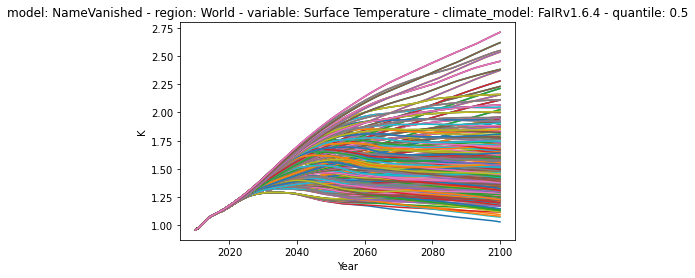

In [3]:
temps_py = pyam.IamDataFrame(temps)
temps_py.filter(quantile=0.5).plot()

In [4]:
temps_round = temps.copy()
round_val = 0.05
times = np.arange(2010, 2101)
for col in times:
    if str(col) in temps_round.columns:
        temps_round[str(col)] = (temps_round[str(col)] / round_val).round() * round_val
temps_round

,climate_model,model,region,scenario,unit,variable,quantile,2010,2011,2012,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,FaIRv1.6.4,NameVanished,World,scen_2030fact0.12_nz2040_ov-10000_meth0.25,K,Surface Temperature,0.1,0.95,0.95,0.95,...,0.85,0.85,0.85,0.80,0.80,0.80,0.80,0.80,0.80,0.80
1,FaIRv1.6.4,NameVanished,World,scen_2030fact0.12_nz2040_ov-10000_meth0.5,K,Surface Temperature,0.1,0.95,0.95,0.95,...,0.90,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85
2,FaIRv1.6.4,NameVanished,World,scen_2030fact0.12_nz2040_ov-10000_meth0.75,K,Surface Temperature,0.1,0.95,0.95,0.95,...,0.90,0.90,0.90,0.90,0.90,0.90,0.90,0.90,0.85,0.85
3,FaIRv1.6.4,NameVanished,World,scen_2030fact0.12_nz2040_ov-5000_meth0.25,K,Surface Temperature,0.1,0.95,0.95,0.95,...,0.90,0.90,0.90,0.90,0.90,0.85,0.85,0.85,0.85,0.85
4,FaIRv1.6.4,NameVanished,World,scen_2030fact0.12_nz2040_ov-5000_meth0.5,K,Surface Temperature,0.1,0.95,0.95,0.95,...,0.90,0.90,0.90,0.90,0.90,0.90,0.90,0.90,0.90,0.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,FaIRv1.6.4,NameVanished,World,scen_2030fact1.32_nz2200_ov-5000_meth0.5,K,Surface Temperature,0.9,1.00,1.05,1.05,...,3.00,3.00,3.05,3.05,3.05,3.10,3.10,3.10,3.10,3.15
1931,FaIRv1.6.4,NameVanished,World,scen_2030fact1.32_nz2200_ov-5000_meth0.75,K,Surface Temperature,0.9,1.00,1.05,1.05,...,3.10,3.15,3.15,3.15,3.20,3.20,3.20,3.20,3.25,3.25
1932,FaIRv1.6.4,NameVanished,World,scen_2030fact1.32_nz2200_ov0_meth0.25,K,Surface Temperature,0.9,1.00,1.05,1.05,...,2.90,2.90,2.90,2.95,2.95,2.95,2.95,3.00,3.00,3.00
1933,FaIRv1.6.4,NameVanished,World,scen_2030fact1.32_nz2200_ov0_meth0.5,K,Surface Temperature,0.9,1.00,1.05,1.05,...,3.00,3.00,3.05,3.05,3.05,3.10,3.10,3.10,3.10,3.15


In [5]:
relevant_quant = 0.5
temp_inv = temps_round.loc[[i == relevant_quant for i in temps_round["quantile"]], temps_round.columns[7:].values]
temp_inv

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
774,0.95,1.0,1.0,1.05,1.05,1.1,1.1,1.1,1.15,1.15,...,1.05,1.05,1.05,1.05,1.05,1.05,1.05,1.05,1.05,1.05
775,0.95,1.0,1.0,1.05,1.05,1.1,1.1,1.1,1.15,1.15,...,1.15,1.10,1.10,1.10,1.10,1.10,1.10,1.10,1.10,1.10
776,0.95,1.0,1.0,1.05,1.05,1.1,1.1,1.1,1.15,1.15,...,1.15,1.15,1.15,1.15,1.15,1.15,1.15,1.15,1.15,1.10
777,0.95,1.0,1.0,1.05,1.05,1.1,1.1,1.1,1.15,1.15,...,1.15,1.15,1.15,1.15,1.10,1.10,1.10,1.10,1.10,1.10
778,0.95,1.0,1.0,1.05,1.05,1.1,1.1,1.1,1.15,1.15,...,1.20,1.20,1.20,1.20,1.20,1.20,1.20,1.20,1.20,1.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,0.95,1.0,1.0,1.05,1.05,1.1,1.1,1.1,1.15,1.15,...,2.50,2.50,2.55,2.55,2.55,2.55,2.60,2.60,2.60,2.60
1157,0.95,1.0,1.0,1.05,1.05,1.1,1.1,1.1,1.15,1.15,...,2.60,2.60,2.60,2.60,2.65,2.65,2.65,2.70,2.70,2.70
1158,0.95,1.0,1.0,1.05,1.05,1.1,1.1,1.1,1.15,1.15,...,2.45,2.45,2.45,2.45,2.50,2.50,2.50,2.50,2.50,2.55
1159,0.95,1.0,1.0,1.05,1.05,1.1,1.1,1.1,1.15,1.15,...,2.50,2.50,2.55,2.55,2.55,2.55,2.60,2.60,2.60,2.60


In [6]:
binned_temp = temp_inv.drop_duplicates()
binned_temp

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
774,0.95,1.0,1.0,1.05,1.05,1.1,1.1,1.1,1.15,1.15,...,1.05,1.05,1.05,1.05,1.05,1.05,1.05,1.05,1.05,1.05
775,0.95,1.0,1.0,1.05,1.05,1.1,1.1,1.1,1.15,1.15,...,1.15,1.10,1.10,1.10,1.10,1.10,1.10,1.10,1.10,1.10
776,0.95,1.0,1.0,1.05,1.05,1.1,1.1,1.1,1.15,1.15,...,1.15,1.15,1.15,1.15,1.15,1.15,1.15,1.15,1.15,1.10
777,0.95,1.0,1.0,1.05,1.05,1.1,1.1,1.1,1.15,1.15,...,1.15,1.15,1.15,1.15,1.10,1.10,1.10,1.10,1.10,1.10
778,0.95,1.0,1.0,1.05,1.05,1.1,1.1,1.1,1.15,1.15,...,1.20,1.20,1.20,1.20,1.20,1.20,1.20,1.20,1.20,1.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,0.95,1.0,1.0,1.05,1.05,1.1,1.1,1.1,1.15,1.15,...,2.40,2.40,2.40,2.40,2.40,2.40,2.45,2.45,2.45,2.45
1145,0.95,1.0,1.0,1.05,1.05,1.1,1.1,1.1,1.15,1.15,...,2.45,2.45,2.45,2.50,2.50,2.50,2.50,2.55,2.55,2.55
1152,0.95,1.0,1.0,1.05,1.05,1.1,1.1,1.1,1.15,1.15,...,2.45,2.45,2.45,2.45,2.50,2.50,2.50,2.50,2.50,2.55
1153,0.95,1.0,1.0,1.05,1.05,1.1,1.1,1.1,1.15,1.15,...,2.50,2.50,2.55,2.55,2.55,2.55,2.60,2.60,2.60,2.60


In [7]:
# reduction factor:
len(binned_temp) / len(temp_inv)

0.6459948320413437

Conclusion: binning the data does not  reduce the number of pathways by a very substantial amount
## Try PCA

In [8]:
temps_90 = pyam.IamDataFrame(temps).filter(quantile=0.9).timeseries()
temps_50 = pyam.IamDataFrame(temps).filter(quantile=0.5).timeseries()
temps_10 = pyam.IamDataFrame(temps).filter(quantile=0.1).timeseries()
temps_90 = temps_90.reset_index(drop=True)
temps_50 = temps_50.reset_index(drop=True)
temps_10 = temps_10.reset_index(drop=True)

In [9]:
temps_10

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,0.932584,0.949229,0.965410,0.982231,0.996941,1.005958,1.014679,1.024605,1.035805,1.049330,...,0.832518,0.829461,0.826411,0.823372,0.820349,0.817343,0.814353,0.811381,0.808425,0.805486
1,0.932539,0.949206,0.965461,0.982434,0.997389,1.007015,1.016305,1.026918,1.038919,1.053353,...,0.876138,0.873258,0.870356,0.867427,0.864468,0.861480,0.858459,0.855408,0.852325,0.849212
2,0.932460,0.949167,0.965550,0.982788,0.998173,1.008862,1.019068,1.030615,1.043493,1.058705,...,0.897433,0.894359,0.891274,0.888173,0.885054,0.881915,0.878755,0.875575,0.872372,0.869148
3,0.932584,0.949229,0.965410,0.982231,0.996941,1.005958,1.014679,1.024605,1.035805,1.049330,...,0.881285,0.879872,0.878459,0.877046,0.875633,0.874218,0.872802,0.871383,0.869962,0.868539
4,0.932539,0.949206,0.965461,0.982434,0.997389,1.007015,1.016305,1.026918,1.038919,1.053353,...,0.923309,0.921913,0.920498,0.919058,0.917590,0.916093,0.914565,0.913006,0.911416,0.909796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,0.932539,0.949206,0.965461,0.982434,0.997389,1.007015,1.016305,1.026918,1.038919,1.053353,...,2.023394,2.030949,2.038339,2.045560,2.052609,2.059485,2.066187,2.072716,2.079071,2.085256
383,0.932460,0.949167,0.965550,0.982788,0.998173,1.008862,1.019068,1.030615,1.043493,1.058705,...,2.096835,2.105544,2.114124,2.122554,2.130817,2.138904,2.146807,2.154521,2.162045,2.169378
384,0.932584,0.949229,0.965410,0.982231,0.996941,1.005958,1.014679,1.024605,1.035805,1.049330,...,1.945621,1.952590,1.959525,1.966426,1.973292,1.980122,1.986912,1.993659,2.000360,2.007009
385,0.932539,0.949206,0.965461,0.982434,0.997389,1.007015,1.016305,1.026918,1.038919,1.053353,...,2.023394,2.030949,2.038339,2.045560,2.052609,2.059485,2.066187,2.072716,2.079071,2.085256


In [10]:
temps_50

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,0.960186,0.982139,1.010964,1.041063,1.068669,1.086271,1.100091,1.114299,1.128455,1.145751,...,1.061912,1.058922,1.055889,1.052827,1.049744,1.046646,1.043537,1.040420,1.035904,1.030944
1,0.960140,0.982107,1.011040,1.041494,1.069600,1.087428,1.101901,1.116914,1.131881,1.150215,...,1.127574,1.124091,1.120507,1.116832,1.113073,1.109826,1.106739,1.103581,1.100187,1.095944
2,0.960060,0.982050,1.011174,1.042250,1.071229,1.089447,1.104986,1.121130,1.136975,1.156260,...,1.162370,1.158812,1.155150,1.151393,1.147548,1.142686,1.137650,1.132587,1.128313,1.123992
3,0.960186,0.982139,1.010964,1.041063,1.068669,1.086271,1.100091,1.114299,1.128455,1.145751,...,1.129683,1.128343,1.126974,1.125581,1.124169,1.122743,1.121303,1.119853,1.118394,1.116926
4,0.960140,0.982107,1.011040,1.041494,1.069600,1.087428,1.101901,1.116914,1.131881,1.150215,...,1.195121,1.193820,1.192457,1.191031,1.189544,1.187995,1.186389,1.184726,1.183009,1.181242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,0.960140,0.982107,1.011040,1.041494,1.069600,1.087428,1.101901,1.116914,1.131881,1.150215,...,2.497383,2.511398,2.525269,2.538986,2.552542,2.565933,2.579159,2.592217,2.605108,2.617833
383,0.960060,0.982050,1.011174,1.042250,1.071229,1.089447,1.104986,1.121130,1.136975,1.156260,...,2.583378,2.595895,2.608245,2.623033,2.638032,2.652846,2.667471,2.681904,2.696146,2.710200
384,0.960186,0.982139,1.010964,1.041063,1.068669,1.086271,1.100091,1.114299,1.128455,1.145751,...,2.426895,2.439968,2.452993,2.465963,2.478872,2.491092,2.502051,2.512925,2.523707,2.534391
385,0.960140,0.982107,1.011040,1.041494,1.069600,1.087428,1.101901,1.116914,1.131881,1.150215,...,2.497383,2.511398,2.525269,2.538986,2.552542,2.565933,2.579159,2.592217,2.605108,2.617833


In [11]:
quantile_range = [10, 50, 90, "all"]
decomposers2 = {}
decomposers3 = {}
decomposers4 = {}
reconstructed2 = {}
reconstructed3 = {}
reconstructed4 = {}
temp_data = {10: temps_10, 50: temps_50, 90:temps_90, "all": pd.concat([temps_10, temps_50, temps_90])}
for i in quantile_range:
    decomposers2[i] = sklearn.decomposition.PCA(2).fit(temp_data[i])
    decomposers3[i] = sklearn.decomposition.PCA(3).fit(temp_data[i])
    decomposers4[i] = sklearn.decomposition.PCA(4).fit(temp_data[i])
    reconstructed2[i] = decomposers2[i].inverse_transform(decomposers2[i].transform(temp_data[i]))
    reconstructed3[i] = decomposers3[i].inverse_transform(decomposers3[i].transform(temp_data[i]))
    reconstructed4[i] = decomposers4[i].inverse_transform(decomposers4[i].transform(temp_data[i]))

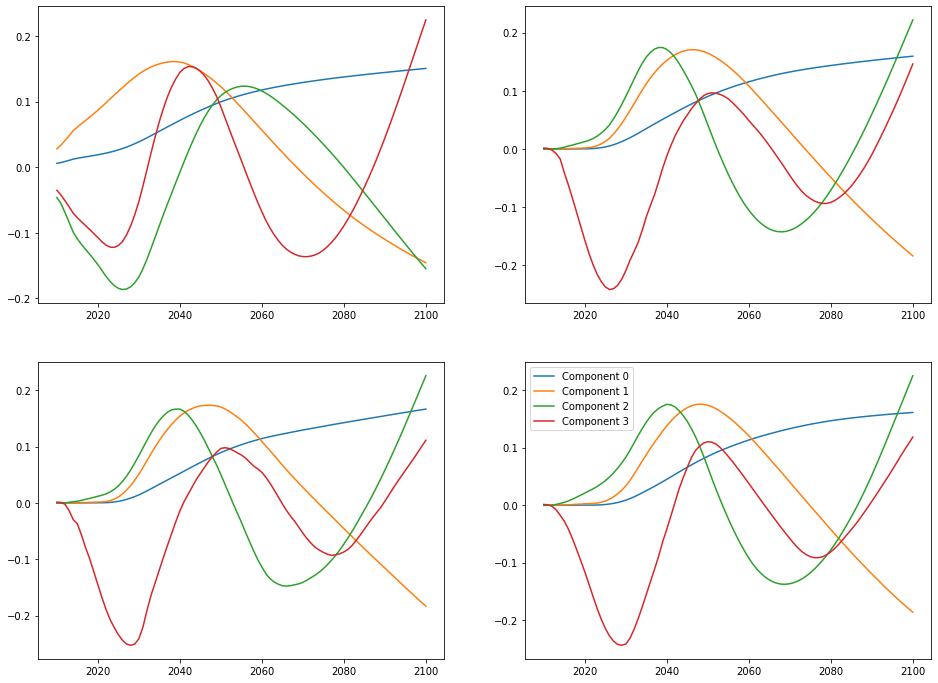

In [12]:
plt.figure(figsize=(16, 12))
leg_string = []
ax = plt.subplot(221)
for i in range(4):
    plt.plot(times, decomposers4["all"].components_[i])
    leg_string.append(f"Component {i}")

ax = plt.subplot(222)
for i in range(4):
    plt.plot(times, decomposers4[10].components_[i])

ax = plt.subplot(223)
for i in range(4):
    plt.plot(times, decomposers4[50].components_[i])

ax = plt.subplot(224)
for i in range(4):
    plt.plot(times, decomposers4[90].components_[i])
plt.legend(leg_string)


Text(0.5, 1.0, 'Reconstructed 2 for 50% data')

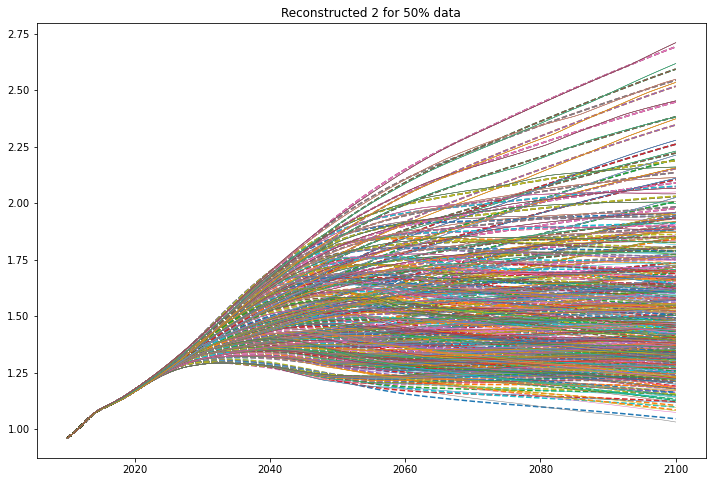

In [13]:
plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
temp_temp = pd.DataFrame(reconstructed2[50], columns=times)
temp_temp.transpose().plot(ax=ax, legend=False, linestyle="--")
temps_50.transpose().plot(legend=False, ax=ax, linewidth=0.5)
plt.title("Reconstructed 2 for 50% data")

Text(0.5, 1.0, 'Reconstructed 2 for 50% data, half of data hidden for visibility')

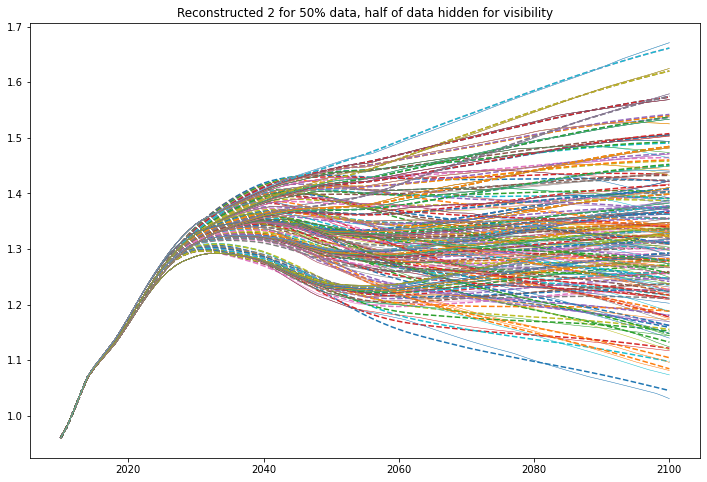

In [14]:
plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
temp_temp = pd.DataFrame(reconstructed2[50], columns=times)
temp_temp.head(150).transpose().plot(ax=ax, legend=False, linestyle="--")
temps_50.head(150).transpose().plot(legend=False, ax=ax, linewidth=0.5)
plt.title("Reconstructed 2 for 50% data, half of data hidden for visibility")

In [15]:
# Accuracy at reconstructing only one quantile from results fitted to itself with only 2 or 3 components
(pd.DataFrame(reconstructed2[50], columns=times) - temp_data[50]).values.max()

0.04764317707249721

In [16]:
(pd.DataFrame(reconstructed3[50], columns=times) - temp_data[50]).values.max()

0.01777929013636359

In [17]:
(pd.DataFrame(reconstructed4[50], columns=times) - temp_data[50]).values.max()

0.01423682421595629

In [18]:
# However reconstructing all quantiles with results fitted to all quantiles is much less accurate with 3 components
(pd.DataFrame(reconstructed3["all"], columns=times).reset_index(drop=True) - temp_data["all"].reset_index(drop=True)).values.max()

0.051024498462919565

In [19]:
# Even 4 isn't that accurate
(pd.DataFrame(reconstructed4["all"], columns=times).reset_index(drop=True) - temp_data["all"].reset_index(drop=True)).values.max()

0.020695588063719628

<AxesSubplot:>

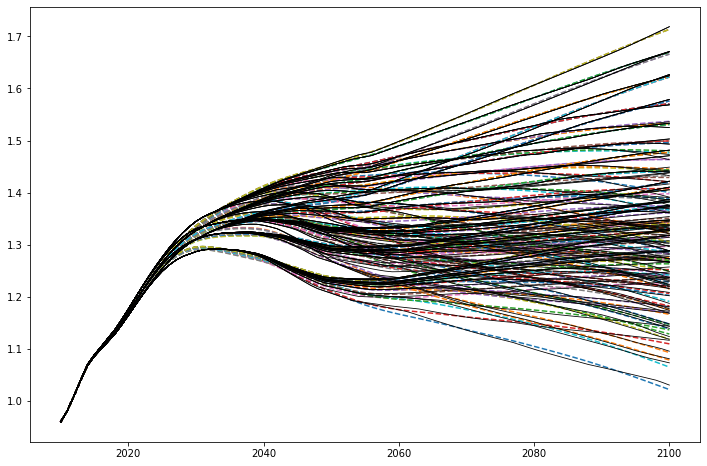

In [20]:
plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
temp_temp = pd.DataFrame(reconstructed3[50], columns=times)
temp_temp.head(160).transpose().plot(ax=ax, legend=False, linestyle="--")
temps_50.head(160).transpose().plot(legend=False, ax=ax, linewidth=0.8, color="black")

Text(0.5, 1.0, 'Reconstructed 2 for all data')

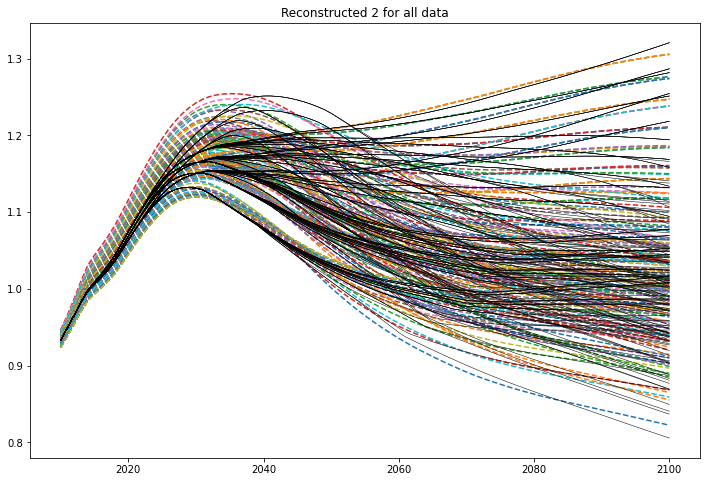

In [21]:
plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
temp_temp = pd.DataFrame(reconstructed2["all"], columns=times)
temp_temp.head(180).transpose().plot(ax=ax, legend=False, linestyle="--")
temp_data["all"].head(180).transpose().plot(legend=False, ax=ax, linewidth=0.5, color="black")
plt.title("Reconstructed 2 for all data")

Text(0.5, 1.0, 'Reconstructed 3 for all data')

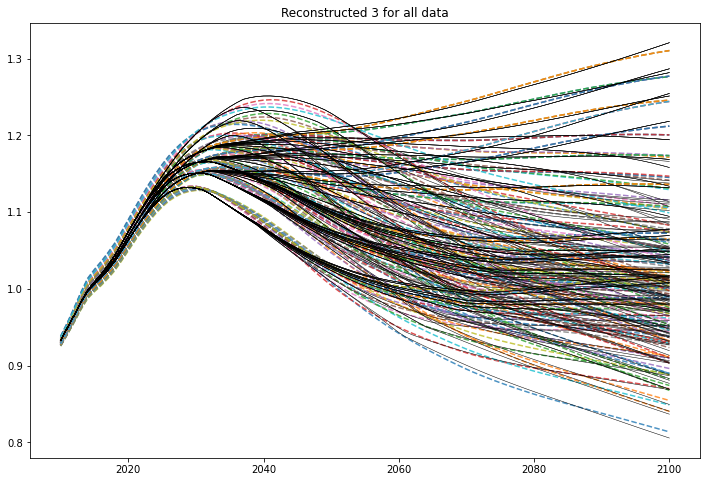

In [22]:
plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
temp_temp = pd.DataFrame(reconstructed3["all"], columns=times)
temp_temp.head(180).transpose().plot(ax=ax, legend=False, linestyle="--", alpha=0.8)
temp_data["all"].head(180).transpose().plot(legend=False, ax=ax, linewidth=0.5, color="black")
plt.title("Reconstructed 3 for all data")

Text(0.5, 1.0, 'Reconstructed 4 for all data')

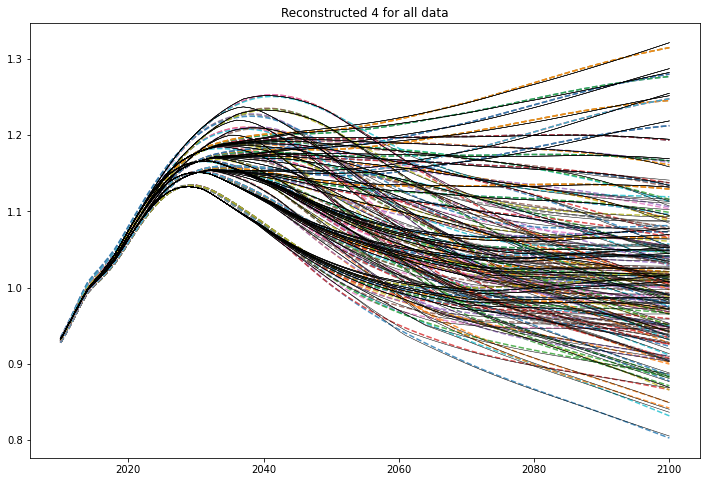

In [23]:
plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
temp_temp = pd.DataFrame(reconstructed4["all"], columns=times)
temp_temp.head(180).transpose().plot(ax=ax, legend=False, linestyle="--", alpha=0.8)
temp_data["all"].head(180).transpose().plot(legend=False, ax=ax, linewidth=0.5, color="black")
plt.title("Reconstructed 4 for all data")

<AxesSubplot:>

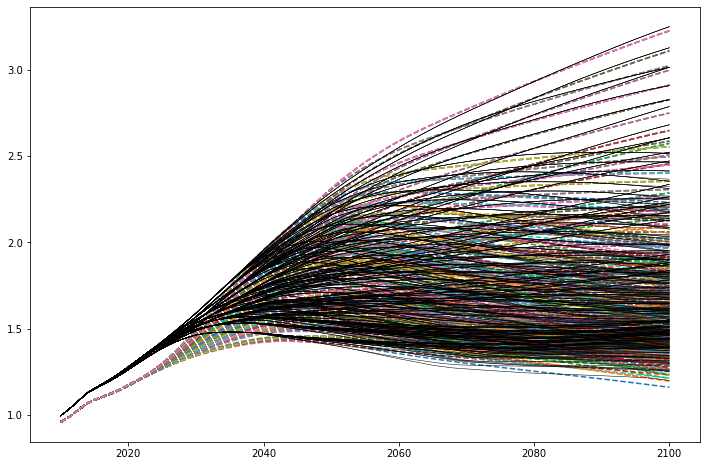

In [24]:
# Compare this to the effect of using the wrongly-calibrated PCA
temp90_from_50 = decomposers2[50].inverse_transform(decomposers2[50].transform(temp_data[90]))
plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
temp_temp = pd.DataFrame(temp90_from_50, columns=times)
temp_temp.transpose().plot(ax=ax, legend=False, linestyle="--")
temp_data[90].transpose().plot(legend=False, ax=ax, linewidth=0.5, color="black")

In [25]:
# There is a distinct offset error at low times if using the miscalibrated data but otherwise the results work reasonably well. 

# Apply PCA to the FaIR timeseries directly

In [26]:
fair_df = fair_df.set_index("scenario")

In [27]:
to_fit_fair = fair_df.loc[:, [str(x) for x in times]]
to_fit_fair.columns = [int(x) for x in to_fit_fair.columns]

In [28]:
fair_pca4 = sklearn.decomposition.PCA(4).fit(to_fit_fair)
fair_pca5 = sklearn.decomposition.PCA(5).fit(to_fit_fair)
fair_pca6 = sklearn.decomposition.PCA(6).fit(to_fit_fair)
freconstructed4 = fair_pca4.inverse_transform(fair_pca4.transform(to_fit_fair))
freconstructed4 = pd.DataFrame(freconstructed4, columns=times).set_index(to_fit_fair.index)
freconstructed5 = fair_pca5.inverse_transform(fair_pca5.transform(to_fit_fair))
freconstructed5 = pd.DataFrame(freconstructed5, columns=times).set_index(to_fit_fair.index)
freconstructed6 = fair_pca6.inverse_transform(fair_pca6.transform(to_fit_fair))
freconstructed6 = pd.DataFrame(freconstructed6, columns=times).set_index(to_fit_fair.index)

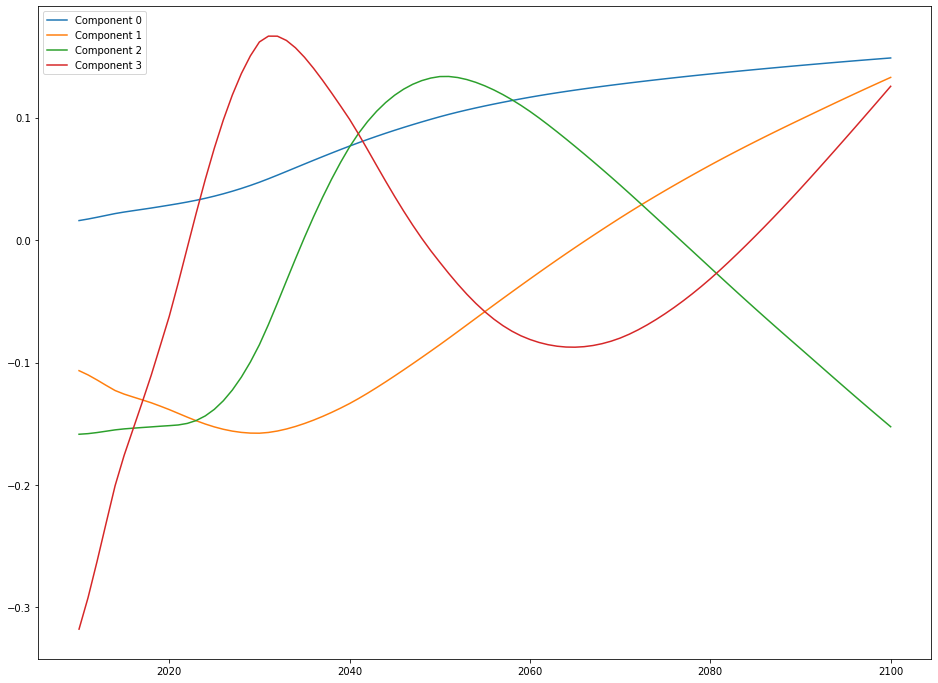

In [29]:
plt.figure(figsize=(16, 12))
leg_string = []
ax = plt.subplot(111)
for i in range(4):
    plt.plot(times, fair_pca4.components_[i])
    leg_string.append(f"Component {i}")
plt.legend(leg_string)

In [30]:
to_fit_t = to_fit_fair.transpose()

Text(0.5, 1.0, 'Reconstructed 4 for all data')

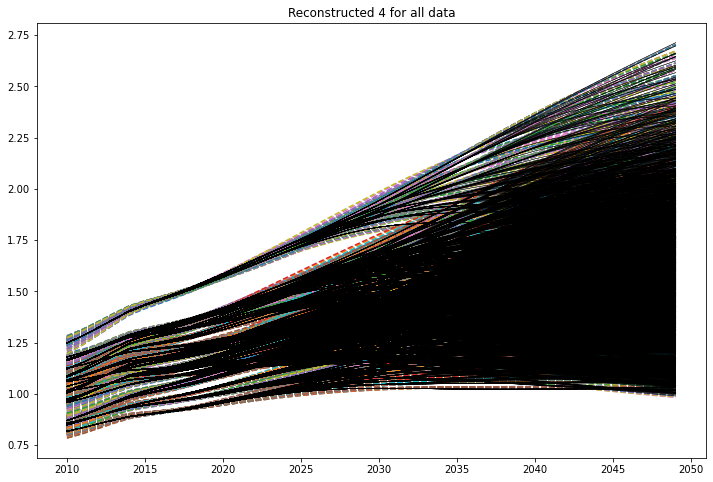

In [31]:
plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
freconstructed4.transpose().head(40).plot(ax=ax, legend=False, linestyle="--")
to_fit_fair.transpose().head(40).plot(legend=False, ax=ax, linewidth=0.5, color="black", alpha=0.6)
plt.title("Reconstructed 4 for all data")

Text(0.5, 1.0, 'Reconstructed 5 for all data')

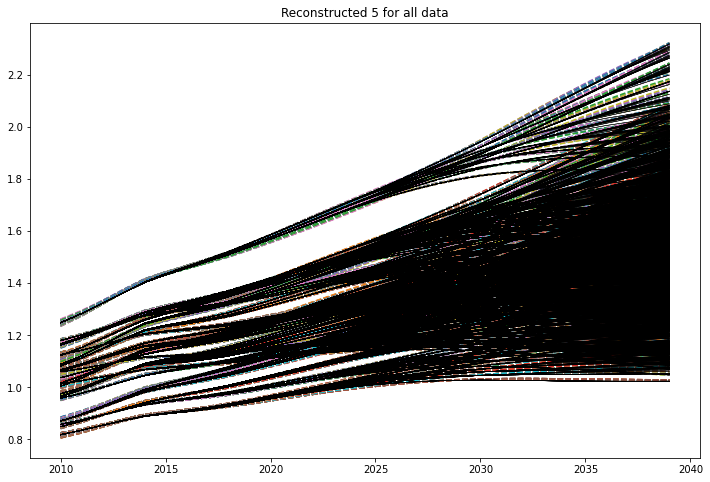

In [32]:
plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
freconstructed5.transpose().head(30).plot(ax=ax, legend=False, linestyle="--")
to_fit_t.head(30).plot(legend=False, ax=ax, linewidth=0.5, color="black", alpha=0.8)
plt.title("Reconstructed 5 for all data")

Text(0.5, 1.0, 'Reconstructed 6 for all data')

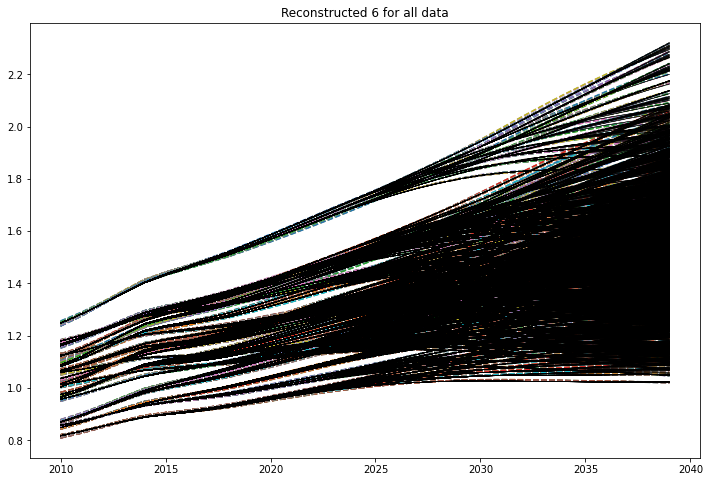

In [33]:
plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
freconstructed6.transpose().head(30).plot(ax=ax, legend=False, linestyle="--")
to_fit_t.head(30).plot(legend=False, ax=ax, linewidth=0.5, color="black", alpha=0.8)
plt.title("Reconstructed 6 for all data")

In [34]:
# Accuracy is not that good with even 4-6 parameters
(freconstructed4 - to_fit_fair).values.max()

0.05418595310011254

In [35]:
(freconstructed5 - to_fit_fair).values.max()

0.024354319562059246

In [36]:
(freconstructed6 - to_fit_fair).values.max()

0.021630025524005392

# Reconstructing emissions from temperature space

In [37]:
temps_py_desc = temps_py.data

In [38]:
def decode_scen(df):
    df["factor2030"] = [float(x[1][:4]) for x in df["scenario"].str.split("2030fact")]
    df["nzdate"] = [int(x[1][:4]) for x in df["scenario"].str.split("_nz")]
    df["overshoot"] = [float(x[3][2:]) for x in df["scenario"].str.split("_")]
    df["methane"] = [float(x[4][4:]) for x in df["scenario"].str.split("_")]
    return df
temps_py_desc = decode_scen(temps_py_desc)

In [39]:
temps_py_desc

,model,scenario,region,variable,unit,year,climate_model,quantile,value,factor2030,nzdate,overshoot,methane
0,NameVanished,scen_2030fact0.12_nz2040_ov-10000_meth0.25,World,Surface Temperature,K,2010,FaIRv1.6.4,0.10,0.932584,0.12,2040,-10000.0,0.25
1,NameVanished,scen_2030fact0.12_nz2040_ov-10000_meth0.25,World,Surface Temperature,K,2010,FaIRv1.6.4,0.33,0.949845,0.12,2040,-10000.0,0.25
2,NameVanished,scen_2030fact0.12_nz2040_ov-10000_meth0.25,World,Surface Temperature,K,2010,FaIRv1.6.4,0.50,0.960186,0.12,2040,-10000.0,0.25
3,NameVanished,scen_2030fact0.12_nz2040_ov-10000_meth0.25,World,Surface Temperature,K,2010,FaIRv1.6.4,0.66,0.971336,0.12,2040,-10000.0,0.25
4,NameVanished,scen_2030fact0.12_nz2040_ov-10000_meth0.25,World,Surface Temperature,K,2010,FaIRv1.6.4,0.90,0.996931,0.12,2040,-10000.0,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
176080,NameVanished,scen_2030fact1.32_nz2200_ov0_meth0.75,World,Surface Temperature,K,2100,FaIRv1.6.4,0.10,2.169378,1.32,2200,0.0,0.75
176081,NameVanished,scen_2030fact1.32_nz2200_ov0_meth0.75,World,Surface Temperature,K,2100,FaIRv1.6.4,0.33,2.593141,1.32,2200,0.0,0.75
176082,NameVanished,scen_2030fact1.32_nz2200_ov0_meth0.75,World,Surface Temperature,K,2100,FaIRv1.6.4,0.50,2.710200,1.32,2200,0.0,0.75
176083,NameVanished,scen_2030fact1.32_nz2200_ov0_meth0.75,World,Surface Temperature,K,2100,FaIRv1.6.4,0.66,2.943576,1.32,2200,0.0,0.75


In [40]:
pca3_50pc = decode_scen(
    pd.DataFrame(decomposers3[50].transform(temp_data[50]), columns=["PCA1", "PCA2", "PCA3"]).set_index(
        pyam.IamDataFrame(temps).filter(quantile=0.5).timeseries().index.get_level_values("scenario")
    ).reset_index()
)
pca3_50pc

,scenario,PCA1,PCA2,PCA3,factor2030,nzdate,overshoot,methane
0,scen_2030fact0.12_nz2040_ov-10000_meth0.25,-3.414983,0.009620,-0.102186,0.12,2040,-10000.0,0.25
1,scen_2030fact0.12_nz2040_ov-10000_meth0.5,-2.956468,0.104109,-0.049138,0.12,2040,-10000.0,0.50
2,scen_2030fact0.12_nz2040_ov-10000_meth0.75,-2.712787,0.173283,-0.015588,0.12,2040,-10000.0,0.75
3,scen_2030fact0.12_nz2040_ov-5000_meth0.25,-3.134817,-0.150843,-0.050838,0.12,2040,-5000.0,0.25
4,scen_2030fact0.12_nz2040_ov-5000_meth0.5,-2.676350,-0.055627,0.002887,0.12,2040,-5000.0,0.50
...,...,...,...,...,...,...,...,...
382,scen_2030fact1.32_nz2200_ov-5000_meth0.5,5.283180,-0.525981,0.073993,1.32,2200,-5000.0,0.50
383,scen_2030fact1.32_nz2200_ov-5000_meth0.75,5.832581,-0.566018,0.054376,1.32,2200,-5000.0,0.75
384,scen_2030fact1.32_nz2200_ov0_meth0.25,4.812061,-0.540720,0.048401,1.32,2200,0.0,0.25
385,scen_2030fact1.32_nz2200_ov0_meth0.5,5.283180,-0.525981,0.073993,1.32,2200,0.0,0.50


In [41]:
import seaborn

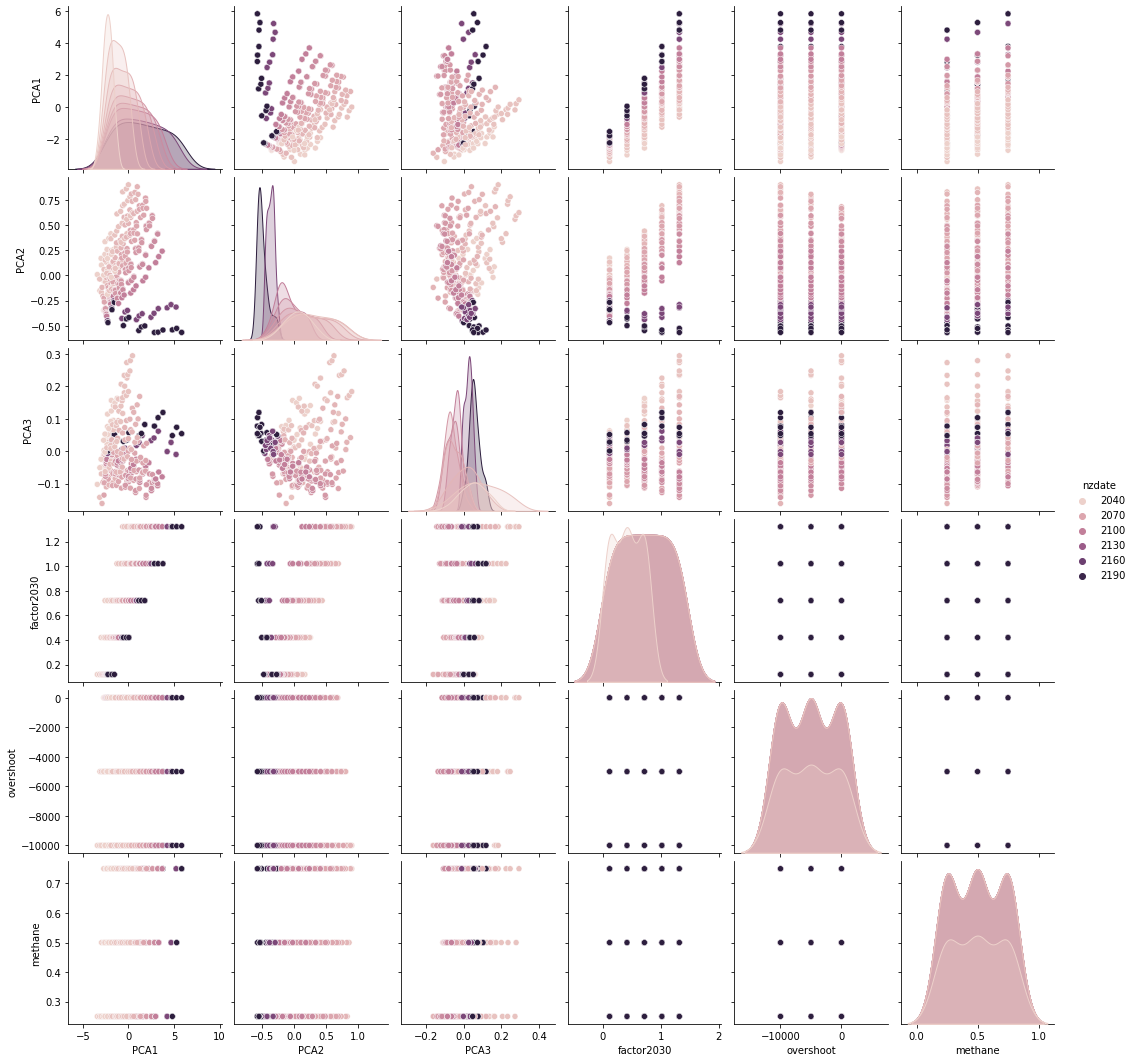

In [42]:
seaborn.pairplot(pca3_50pc, hue="nzdate")

## First see if there is a direct relationship with temperature and emissions parameters

In [43]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [44]:
functional_cols = ["year", "factor2030", "nzdate", "overshoot", "methane"]
poly = PolynomialFeatures(degree=3)
poly_variables = poly.fit_transform(temps_py_desc.loc[:, functional_cols])
results = temps_py_desc.loc[:, "value"] 

In [45]:
poly_var_train, poly_var_test, res_train, res_test = train_test_split(
    poly_variables, results, test_size = 0.2, random_state = 4
)

In [46]:
regression = linear_model.LinearRegression()
poly_model = regression.fit(poly_var_train, res_train)
score = poly_model.score(poly_var_test, res_test)
score
# Unimpressive score for all values of degree

0.693843686849205

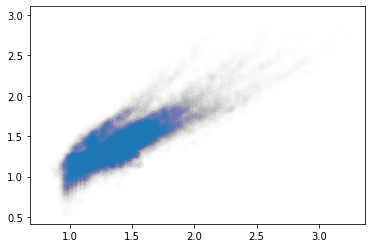

In [47]:
plt.scatter(res_test, poly_model.predict(poly_var_test), alpha=0.005)

## Now see if there is a better result using the PCA version of temps
Experiments indicate that the 3rd PCA is very hard to fit and requires a polynomial of degree 4 and small test data to even be positive in expectation. 

In [48]:
# The numerical stability of calculations is higher when variables are all of order 1
pca3_50pc["nzreduced"] = pca3_50pc["nzdate"] / 1000
pca3_50pc["overshootreduced"] = pca3_50pc["overshoot"]/1000

In [49]:
poly3 = PolynomialFeatures(degree=3)
pca_functional_cols = ["factor2030", "nzreduced", "overshootreduced", "methane"]
store_pca_var3 = {}
# Derive relationship between each PC and the polynomial of the emissions variables
for comp in ["PCA1", "PCA2", "PCA3"]:
    poly_variables = poly3.fit_transform(pca3_50pc.loc[:, pca_functional_cols])
    results = pca3_50pc.loc[:, comp]
    regression = linear_model.LinearRegression()
    poly_var_train, poly_var_test, res_train, res_test = train_test_split(
        poly_variables, results, test_size = 0.15, random_state = 4
    )
    poly_model = regression.fit(poly_var_train, res_train)
    score = poly_model.score(poly_var_test, res_test)
    print(score)
    store_pca_var3[comp] = poly_model

0.9982551073606258
0.9805129496262504
0.40770110198433074


In [50]:
poly4 = PolynomialFeatures(degree=4)
store_pca_var4 = {}
PCAs = ["PCA1", "PCA2", "PCA3"]
for comp in PCAs:
    poly_variables = poly4.fit_transform(pca3_50pc.loc[:, pca_functional_cols])
    results = pca3_50pc.loc[:, comp]
    regression = linear_model.LinearRegression()
    poly_var_train, poly_var_test, res_train, res_test = train_test_split(
        poly_variables, results, test_size = 0.15, random_state = 4
    )
    poly_model = regression.fit(poly_var_train, res_train)
    score = poly_model.score(poly_var_test, res_test)
    print(score)
    store_pca_var4[comp] = poly_model

0.9998553022894415
0.9950483532772775
0.9024290291381143


In [51]:
poly5 = PolynomialFeatures(degree=5)
store_pca_var5 = {}
PCAs = ["PCA1", "PCA2", "PCA3"]
for comp in PCAs:
    poly_variables = poly5.fit_transform(pca3_50pc.loc[:, pca_functional_cols])
    results = pca3_50pc.loc[:, comp]
    regression = linear_model.LinearRegression()
    poly_var_train, poly_var_test, res_train, res_test = train_test_split(
        poly_variables, results, test_size = 0.15, random_state = 4
    )
    poly_model = regression.fit(poly_var_train, res_train)
    score = poly_model.score(poly_var_test, res_test)
    print(score)
    store_pca_var5[comp] = poly_model

0.9994348847731287
0.9921532495090241
0.9393686861829368


Quality of polynomial matching the original is sufficient when we use a 5th order polynomial. 

In [52]:
def pca_fun_meth_sep(vec, answer, meth):
    # Function that establishes how far away the polynomial extension of the emissions parameters are from giving the 
    # PCA values 1-3, with methane level prescribed.
    return np.array([
        store_pca_var5["PCA1"].predict(poly5.fit_transform(np.hstack([vec, meth]).reshape(1, 4))) - answer[0],
        store_pca_var5["PCA2"].predict(poly5.fit_transform(np.hstack([vec, meth]).reshape(1, 4))) - answer[1],
        store_pca_var5["PCA3"].predict(poly5.fit_transform(np.hstack([vec, meth]).reshape(1, 4))) - answer[2],
    ]).squeeze()

In [53]:
def pca_fun(vec, answer):
    # Function that establishes how far away the polynomial extension of the emissions parameters are from giving the 
    # PCA values 1-3.
    return np.array([
        store_pca_var5["PCA1"].predict(poly5.fit_transform(vec.reshape(1, 4))) - answer[0],
        store_pca_var5["PCA2"].predict(poly5.fit_transform(vec.reshape(1, 4))) - answer[1],
        store_pca_var5["PCA3"].predict(poly5.fit_transform(vec.reshape(1, 4))) - answer[2],
    ]).squeeze()

In [54]:
# check that the function returns the approximate answer when given a true parallel. This gives an upper bound on the 
# allowable error in root finding. 
pca_fun(
    pca3_50pc.loc[0, ["factor2030", "nzreduced", "overshootreduced", "methane"]].values,
    pca3_50pc.loc[0, PCAs],
)

array([ 0.06200402, -0.03323413, -0.03548994])

In [55]:
pca3_50pc.loc[0, PCAs]

PCA1   -3.414983
PCA2     0.00962
PCA3   -0.102186
Name: 0, dtype: object

In [56]:
decomposers3[50].transform(temp_data[50].loc[0:0])

array([[-3.41498269,  0.00962015, -0.10218597]])

In [74]:
meth=0.25
meth_sep_soln = fsolve(
    pca_fun_meth_sep, np.array([1.5, 2.050, -5.000]), 
    args=(decomposers3[50].transform(temp_data[50].loc[0:0]).squeeze(), meth)
)
soln
# Although the solution is found, it involves a bad date (too early). 

array([ 1.32165186,  2.01313181, -4.9999917 ])

In [64]:
root_soln = root(
    pca_fun_meth_sep, 
    x0=np.array([1.5, 2.039, -1.000]), 
    args=(pca3_50pc.loc[0:0, PCAs].values.squeeze(), meth),   
)
print("methane: {}".format(meth))
print(root_soln)
# Again it finds an invalid solution

methane: 0.25
    fjac: array([[-0.21934379,  0.97349377,  0.06479334],
       [-0.96918975, -0.22503928,  0.10014266],
       [-0.1120693 ,  0.04083137, -0.99286115]])
     fun: array([ 0.59316607, -0.20456704,  0.04345013])
 message: 'The iteration is not making good progress, as measured by the \n  improvement from the last ten iterations.'
    nfev: 62
     qtf: array([-0.32643675, -0.52450365, -0.11796841])
       r: array([  -321.24086377,    251.49222085,   2024.1022734 ,   -656.65473922,
         3274.02608139, -31383.8773383 ])
  status: 5
 success: False
       x: array([4.14388808e-01, 2.00685057e+00, 1.58225484e-05])


In [76]:
"""
root_soln = root(
    pca_fun, 
    x0=np.array([1.5, 2.039, -1.000, 0.5]), 
    args=(pca3_50pc.loc[0:0, PCAs].values.squeeze(),),
    method='lm'
)
"""

"\nroot_soln = root(\n    pca_fun, \n    x0=np.array([1.5, 2.039, -1.000, 0.5]), \n    args=(pca3_50pc.loc[0:0, PCAs].values.squeeze(),),\n    method='lm'\n)\n"

In [71]:
# Using least squares optimisation we can impose a condition requiring that the answer is within certain bounds
sq_soln = least_squares(
    pca_fun,
    x0=np.array([1.5, 2.039, -1.000, 0.5]), 
    bounds=([0, 2.031, -20, 0.1], [10, 2.300, 0, 0.9]),
    args=(pca3_50pc.loc[0:0, PCAs].values.squeeze(), ),
    #xtol=3e-16,
    #diff_step=1e-9
)
print("methane: {}".format(meth))
print(sq_soln)

methane: 0.25
 active_mask: array([0, 0, 0, 0])
        cost: 1.2712548811299644e-15
         fun: array([ 2.62213806e-09, -1.29950609e-08,  4.86493838e-08])
        grad: array([ 2.69581216e-06, -5.61848753e-06,  2.04277686e-03, -1.83184027e-03])
         jac: array([[ 9.92913251e+01,  1.60852915e+02, -2.97910000e+04,
         4.82160000e+04],
       [-2.78712491e+02, -6.03802233e+00, -1.44435000e+04,
        -2.05455000e+04],
       [-2.43873430e+01, -1.25772005e+02,  3.97373750e+04,
        -4.57407500e+04]])
     message: '`xtol` termination condition is satisfied.'
        nfev: 51
        njev: 28
  optimality: 0.040853010432527266
      status: 3
     success: True
           x: array([ 1.14813656e+00,  2.07021428e+00, -1.23688650e-03,  4.98849133e-01])


In [79]:
# Check the solutions actually work - several currently don't. 
print(pca_fun(sq_soln.x, decomposers3[50].transform(temp_data[50].iloc[0:1]).squeeze()))
print(pca_fun_meth_sep(meth_sep_soln, decomposers3[50].transform(temp_data[50].iloc[0:1]).squeeze(), meth))
print(pca_fun_meth_sep(root_soln.x, decomposers3[50].transform(temp_data[50].iloc[0:1]).squeeze(), meth))
# The final option is not a valid solution

[ 2.62213673e-09 -1.29950615e-08  4.86493839e-08]
[-1.46389475e-07  3.44632807e-07  8.21769966e-08]
[ 0.59316607 -0.20456704  0.04345013]


In [84]:
# Check if we can find other roots via different starting points

sq_solns = []
start_points = [
    np.array([0.11, 2.035, -10.000]), np.array([0.5, 2.035, -10.000]), np.array([0.8, 2.035, -10.000]), 
    np.array([0.11, 2.05, -10.000]), np.array([0.5, 2.05, -10.000]), np.array([0.8, 2.05, -10.000]), 
    np.array([0.11, 2.05, -1.000]), np.array([0.5, 2.05, -1.000]), np.array([0.8, 2.05, -1.000]), 
]
for meth in [0.25, 0.5, 0.75]:
    print("methane: {}".format(meth))
    for x0 in start_points:
        sq_soln = least_squares(
            pca_fun_meth_sep, 
            x0=x0, 
            bounds=([0, 2.031, -20], [10, 2.300, 0]),
            args=(pca3_50pc.loc[0:0, PCAs].values.squeeze(), meth),
            xtol=3e-16,
            diff_step=1e-9
        )
        if (sq_soln.success):
            print(sq_soln.x)
            sq_solns.append(sq_soln.x)
        else: 
            print("Fail")

methane: 0.25
[ 0.12001492  2.03920095 -9.99999996]
[  0.42007013   2.031      -10.00000006]
[ 0.71957123  2.03100053 -9.99999997]
[ 0.12001492  2.03920095 -9.99999996]
[  0.42006215   2.031      -10.00000006]
[ 0.71957364  2.03100005 -9.99999997]
[ 1.20515789e-01  2.04640899e+00 -3.08859891e-11]
[ 1.20588292e-01  2.10713201e+00 -9.25599320e-11]
[ 1.20519633e-01  2.04486199e+00 -1.76268522e-15]
methane: 0.5
[ 0.11986953  2.031      -9.9999999 ]
[ 0.42054824  2.03102316 -9.99999984]
[ 0.71917486  2.03100157 -9.99999976]
[ 0.11987116  2.03100005 -9.9999999 ]
[ 0.42057006  2.03100018 -9.99999984]
[ 0.71914319  2.031      -9.99999976]
[ 1.20502474e-01  2.04190454e+00 -7.85869050e-16]
[ 1.18243973e-01  2.24070941e+00 -6.81167009e-05]
[ 1.20494549e-01  2.05433585e+00 -1.77659609e-09]
methane: 0.75
[ 0.11980531  2.03100061 -9.99999978]
[ 0.42075655  2.031      -9.99999974]
[ 0.71858845  2.031      -9.99999964]
[ 0.11980714  2.031      -9.99999978]
[ 0.42074944  2.03100001 -9.99999974]
[ 0.718

In [87]:
# cf actual answer 
pca3_50pc.loc[0:0]

,scenario,PCA1,PCA2,PCA3,factor2030,nzdate,overshoot,methane,nzreduced,overshootreduced
0,scen_2030fact0.12_nz2040_ov-10000_meth0.25,-3.414983,0.00962,-0.102186,0.12,2040,-10000.0,0.25,2.04,-10.0


In [90]:
# I'm suspicious that some of these shouldn't work
sq_soln = least_squares(
            pca_fun_meth_sep, 
            x0=np.array([0.8, 2.05, -1.000]), 
            bounds=([0, 2.031, -20], [10, 2.300, 0]),
            args=(pca3_50pc.loc[0:0, PCAs].values.squeeze(), 0.25),
            xtol=3e-16,
            diff_step=1e-9
        )
sq_soln

 active_mask: array([0, 0, 0])
        cost: 0.21472514606420978
         fun: array([0.61206764, 0.19495414, 0.12967798])
        grad: array([ 2.01690506e+00,  8.01184905e+00, -1.53670662e+04])
         jac: array([[-3.87430191e+02,  7.28712293e+00, -2.87890434e+04],
       [ 1.15483999e+03,  1.82178073e+01, -1.39772892e+04],
       [ 1.08033419e+02,  0.00000000e+00,  3.83928418e+04]])
     message: '`xtol` termination condition is satisfied.'
        nfev: 51
        njev: 28
  optimality: 0.24307665883428714
      status: 3
     success: True
           x: array([ 1.20519633e-01,  2.04486199e+00, -1.76268522e-15])